<a href="https://colab.research.google.com/github/Stanley2204/TugasDataMining/blob/main/week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Library

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [3]:
#1
url = "https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv"
df = pd.read_csv(url)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [4]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
#3 check missing values
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a _________________________. (fill that blank on the section below)

**Gambaran Dataset:**

- **Jumlah Baris dan Kolom:** Dataset ini memiliki **20.507 baris** dan **5 kolom**.

**Kolom-Kolom:**

1. **Transaction:** Kolom numerik (tipe data **int64**) yang berisi **ID transaksi**.
2. **Item:** Kolom teks (tipe data **object**) yang mencatat **nama barang** yang dibeli dalam setiap transaksi.
3. **date_time:** Kolom teks (tipe data **object**) yang mencatat **waktu pembelian** dalam format **"dd-mm-yyyy hh:mm"**.
4. **period_day:** Kolom teks (tipe data **object**) yang menunjukkan **periode waktu transaksi** seperti "morning", "afternoon", dll.
5. **weekday_weekend:** Kolom teks (tipe data **object**) yang mengindikasikan apakah transaksi terjadi pada **hari kerja** atau **akhir pekan**.

**Pengecekan Nilai Kosong:**
- Tidak ada nilai kosong dalam dataset ini. Setiap kolom memiliki **20.507 entri** lengkap, yang berarti tidak ada data yang hilang.

**Pemakaian Memori:**
- Dataset ini memerlukan **801.2 KB memori**.

**Kesimpulan:**
Dataset ini **bersih** karena tidak ada nilai yang hilang (missing values), sehingga siap untuk analisis lebih lanjut. Data ini mencakup informasi penting mengenai **waktu transaksi**, **periode transaksi**, dan **jenis barang yang dibeli**, yang memungkinkan untuk melakukan analisis perilaku pelanggan berdasarkan **waktu** pembelian, **hari** transaksi, serta **produk** yang dibeli.

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


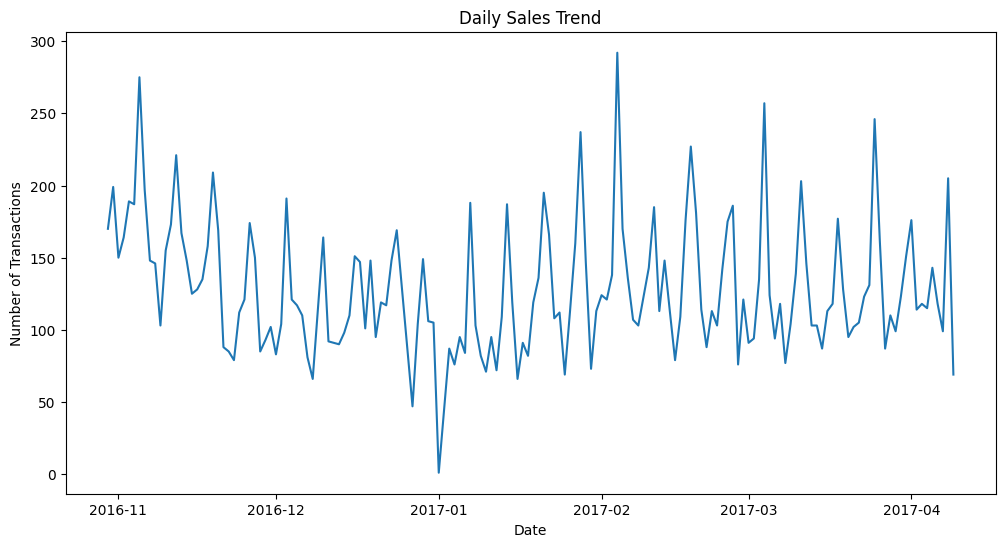

In [6]:
# 5
df['date_time'] = pd.to_datetime(df['date_time'], format="%d-%m-%Y %H:%M")

df['date'] = df['date_time'].dt.date
df['hour'] = df['date_time'].dt.hour

daily_transactions = df.groupby('date')['Transaction'].count()

plt.figure(figsize=(12, 6))
plt.plot(daily_transactions.index, daily_transactions.values)
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Sales Trend')
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [7]:
# 6
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['time'] = df['date_time'].dt.time
df['hour'] = df['date_time'].dt.hour
df['day_name'] = df['date_time'].dt.day_name()


ordered_columns = [
    "Transaction", "Item", "date_time", "period_day", "weekday_weekend",
    "day", "month", "year", "time", "hour", "day_name"
]
df_separate = pd.DataFrame(df[ordered_columns])

df_separate.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend,day,month,year,time,hour,day_name
10828,5415,Sandwich,2017-01-27 11:52:00,morning,weekday,27,1,2017,11:52:00,11,Friday
11571,5752,Coffee,2017-02-01 13:46:00,afternoon,weekday,1,2,2017,13:46:00,13,Wednesday
2704,1307,Fudge,2016-11-14 12:22:00,afternoon,weekday,14,11,2016,12:22:00,12,Monday
15397,7365,Hot chocolate,2017-02-28 17:30:00,evening,weekday,28,2,2017,17:30:00,17,Tuesday
4417,2174,Hot chocolate,2016-11-27 11:02:00,morning,weekend,27,11,2016,11:02:00,11,Sunday



Alright, now I can easily create a visualization of monthly sales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


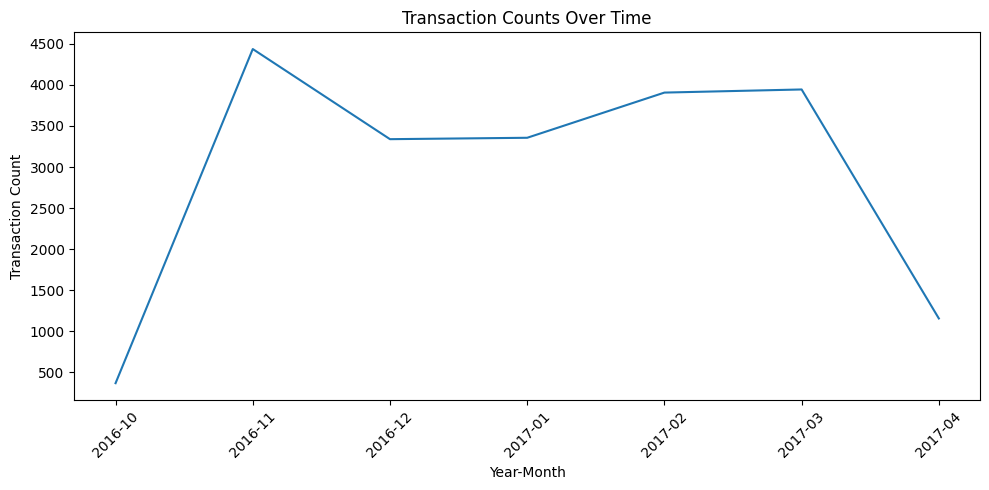

In [8]:
# 7
df_separate['Year-Month'] = df['date_time'].dt.to_period('M').astype(str)

monthly_data = df_separate.groupby('Year-Month').size().reset_index(name='Transaction Count')

plt.figure(figsize=(10, 5))
plt.plot(monthly_data['Year-Month'], monthly_data['Transaction Count'])
plt.title('Transaction Counts Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

**Visualisasi Tren Transaksi Harian:**

Gambar pertama memperlihatkan tren jumlah transaksi harian dari November 2016 hingga April 2017. Secara umum, terdapat fluktuasi signifikan dalam jumlah transaksi, dengan beberapa puncak yang terjadi secara berkala. Di awal Januari 2017, terlihat penurunan jumlah transaksi, yang kemungkinan disebabkan oleh musim liburan atau faktor musiman lainnya. Namun, terjadi peningkatan yang signifikan di akhir bulan dan akhir pekan, yang terlihat dari puncak-puncak yang lebih tajam pada grafik.

**Penjelasan Insights:**
- Dengan membagi data ke dalam kolom yang lebih terstruktur, kita dapat memperoleh wawasan yang lebih mendalam, seperti fakta bahwa transaksi lebih banyak terjadi pada akhir pekan dibandingkan dengan hari kerja, yang tercermin dalam puncak-puncak transaksi pada beberapa hari tersebut.
- **Polarisasi Waktu:** Transaksi juga cenderung terjadi pada jam-jam tertentu. Hal ini bisa dianalisis lebih lanjut dengan data mengenai jam (hour) dan periode waktu dalam sehari (period_day) untuk melihat pola spesifik.

---

**Visualisasi Monthly Sales:**

- **Sumbu X (Year-Month):** Menampilkan periode waktu dalam format tahun-bulan, dimulai dari Oktober 2016 (2016-10) hingga April 2017 (2017-04).
- **Sumbu Y (Transaction Count):** Menunjukkan jumlah transaksi setiap bulan.

**Interpretasi Visualisasi:**
- **Peningkatan Cepat di Awal:** Jumlah transaksi meningkat pesat dari bulan Oktober 2016 (2016-10) ke November 2016 (2016-11). Peningkatan ini kemungkinan disebabkan oleh promosi besar, peluncuran produk baru, atau aktivitas lain yang meningkatkan transaksi.
  
- **Penurunan Stabil Setelah Puncak:** Setelah mencapai puncak pada bulan November 2016, transaksi menurun secara signifikan di bulan Desember 2016 (2016-12). Setelah itu, jumlah transaksi relatif stabil di kisaran 3.000 transaksi per bulan antara Januari 2017 hingga Maret 2017 (2017-01 hingga 2017-03).

- **Penurunan Tajam di Akhir:** Terlihat penurunan tajam pada bulan April 2017 (2017-04). Penurunan ini bisa disebabkan oleh perubahan pola konsumen, berakhirnya promosi tertentu, atau faktor musiman.

---

**Potensi Analisis Lanjutan:**

- **Musiman (Seasonality):** Tren ini menunjukkan adanya pola musiman, dengan peningkatan transaksi di akhir tahun (kemungkinan terkait dengan liburan) dan penurunan setelahnya. Ini membuka kesempatan untuk memahami faktor musiman yang memengaruhi perilaku konsumen.
  
- **Faktor Khusus pada November 2016:** Peningkatan tajam pada bulan November 2016 memerlukan analisis lebih lanjut untuk memahami penyebab pastinya—apakah terkait dengan promosi besar, acara spesial, atau faktor lain yang mendorong lonjakan transaksi.

- **Penurunan di April 2017:** Penurunan tajam pada bulan April dapat dijelaskan dengan mengeksplorasi faktor-faktor lain, seperti perubahan perilaku pelanggan, penurunan permintaan untuk kategori produk tertentu, atau dampak berakhirnya promosi. Menggabungkan data dari kategori produk atau analisis perilaku pelanggan mungkin memberikan wawasan yang lebih jelas tentang penyebab penurunan ini.

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [9]:
#9

weekday_names = df_separate[df_separate['weekday_weekend'] == 'weekday']['day_name'].unique()
weekend_names = df_separate[df_separate['weekday_weekend'] == 'weekend']['day_name'].unique()


print("Unique weekday names:", weekday_names)
print("Unique weekend names:", weekend_names)

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [10]:
#10
monthly_day_transactions = df_separate.pivot_table(index='month', columns='day_name', values='Transaction', aggfunc='count', fill_value=0)
ordered_columns = [
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]
monthly_day_transactions = monthly_day_transactions[ordered_columns]
monthly_day_transactions = monthly_day_transactions.astype(int)
monthly_day_transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is _____

**Tren Berdasarkan Hari (Weekdays vs Weekends):**

- **Weekdays (Senin-Jumat):** Secara konsisten, jumlah transaksi pada hari kerja (weekdays) lebih rendah dibandingkan dengan akhir pekan (weekends), terutama di bulan-bulan seperti November (11) dan Desember (12). Sebagai contoh, pada bulan November, transaksi tertinggi di weekdays terjadi pada hari Jumat (639 transaksi), namun jauh lebih rendah dibandingkan dengan hari Sabtu (879 transaksi) atau Minggu (683 transaksi).
  
- **Weekends (Sabtu-Minggu):** Transaksi pada akhir pekan selalu lebih tinggi dibandingkan dengan hari kerja, menunjukkan bahwa pelanggan cenderung lebih aktif berbelanja pada akhir pekan.

**Pola Berdasarkan Bulan:**

- **Desember (12):** Jumlah transaksi meningkat secara signifikan, baik pada weekdays maupun weekends. Hal ini mungkin dipengaruhi oleh musim liburan atau belanja akhir tahun. Hari Sabtu (776 transaksi) dan Jumat (624 transaksi) mencatatkan aktivitas tertinggi di bulan ini.

- **April (4):** Bulan April menunjukkan penurunan tajam dalam jumlah transaksi, baik pada weekdays maupun weekends, jika dibandingkan dengan bulan-bulan sebelumnya. Penurunan ini kemungkinan berkaitan dengan faktor musiman, seperti berakhirnya musim liburan.

- **November (11):** Aktivitas transaksi tinggi terjadi sepanjang minggu, yang mungkin terkait dengan promosi besar seperti Black Friday atau persiapan belanja akhir tahun.

**Anomali pada Oktober (10):**

- **Oktober (10):** Data menunjukkan transaksi hanya terjadi pada hari Senin (199 transaksi) dan Minggu (170 transaksi), sementara hari lainnya tidak tercatat transaksi. Ini bisa jadi disebabkan oleh data yang tidak lengkap atau adanya peristiwa khusus yang membatasi aktivitas transaksi hanya pada hari-hari tertentu.

**Perbandingan Hari:**

- **Sabtu** adalah hari dengan jumlah transaksi tertinggi di hampir semua bulan, menunjukkan bahwa pelanggan lebih cenderung berbelanja pada hari Sabtu.
- **Senin** sering mencatatkan jumlah transaksi terendah, menunjukkan bahwa aktivitas belanja cenderung lebih sedikit di awal minggu.

**Wawasan Utama:**

- **Akhir Pekan Sebagai Puncak Aktivitas:** Fokuskan promosi atau diskon pada akhir pekan, terutama pada hari Sabtu dan Minggu, untuk memaksimalkan penjualan.
  
- **Peningkatan Musiman di Desember:** Desember menunjukkan lonjakan transaksi yang signifikan, menciptakan peluang besar untuk memanfaatkan momentum liburan dengan strategi pemasaran yang lebih agresif.

- **Penurunan di April:** Perhatikan bulan-bulan dengan transaksi rendah, seperti April, dan sesuaikan strategi untuk menjaga kestabilan pendapatan di periode tersebut.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


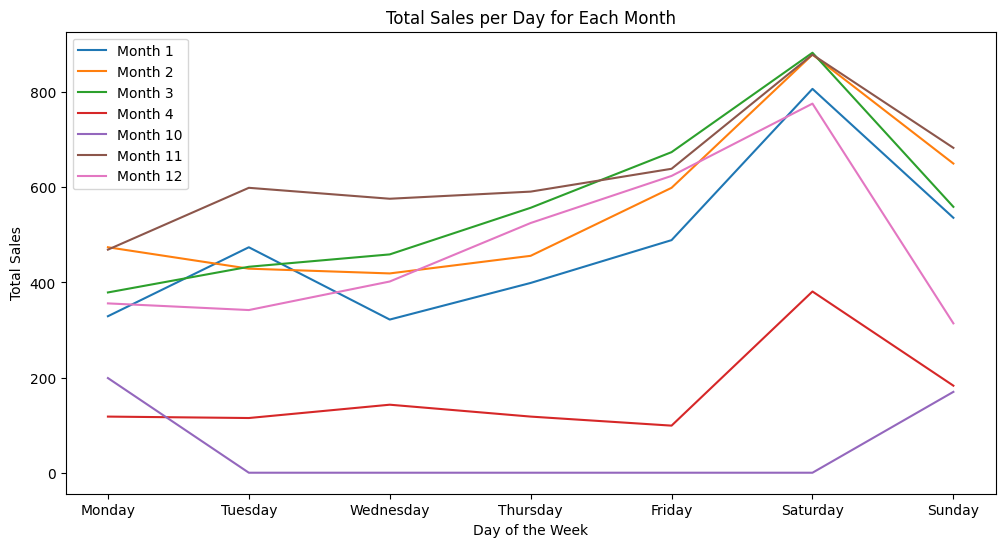

In [11]:
# 12
monthly_day_transactions_transposed = monthly_day_transactions.T
plt.figure(figsize=(12, 6))
for month in monthly_day_transactions_transposed.columns:
    plt.plot(monthly_day_transactions_transposed.index, monthly_day_transactions_transposed[month], label=f'Month {month}')

plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Total Sales per Day for Each Month')
plt.legend()
plt.show()


13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.

**Pola Kenaikan Penjualan di Akhir Pekan:** Secara umum, penjualan menunjukkan kecenderungan meningkat pada hari Jumat dan Sabtu, yang terlihat di hampir semua bulan, terutama pada bulan ke-3, 10, dan 12 yang mengalami puncak penjualan pada akhir pekan. Setelah mencapai puncaknya pada hari Sabtu, penjualan biasanya menurun tajam pada hari Minggu.

**Penjualan yang Konsisten:** Bulan ke-4 (berwarna merah) menunjukkan pola penjualan yang lebih stabil sepanjang minggu, dengan sedikit fluktuasi dari Senin hingga Minggu dibandingkan bulan-bulan lainnya.

**Penurunan Penjualan di Awal Minggu:** Bulan ke-1, 10, dan 11 menunjukkan penurunan penjualan yang signifikan pada hari Senin jika dibandingkan dengan akhir pekan sebelumnya.

**Kinerja Bulanan Secara Keseluruhan:**

- Bulan ke-3 (berwarna hijau) memiliki penjualan yang relatif tinggi dan konsisten, terutama pada akhir pekan.
- Bulan ke-11 (berwarna ungu) menunjukkan tingkat penjualan yang paling rendah sepanjang minggu, kecuali pada hari Sabtu.

**Perbandingan Antar Bulan:** Penjualan pada bulan ke-12 cukup stabil di hari-hari tengah minggu (Selasa hingga Jumat) dan kemudian melonjak tajam pada hari Sabtu. Sebaliknya, bulan ke-1 memperlihatkan peningkatan penjualan yang bertahap dari awal minggu hingga akhir minggu.

**Kesimpulan:**

- Untuk strategi bisnis, fokuskan pada peningkatan stok, promosi, atau aktivitas pemasaran pada hari Jumat dan Sabtu, karena kedua hari ini memiliki potensi penjualan tertinggi.
- Sebaliknya, perlu ada upaya untuk meningkatkan penjualan di awal minggu, terutama pada hari Senin yang cenderung mengalami penurunan penjualan dibandingkan hari lainnya.

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [12]:
# 14
days_name = df_separate['period_day'].unique()
days_name


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [13]:
# 15
hour_ranges = df_separate.groupby('period_day')['hour'].unique()

print("Unique morning_hour:", hour_ranges.get('morning', []))
print("Unique afternoon_hour:", hour_ranges.get('afternoon', []))
print("Unique evening_hour:", hour_ranges.get('evening', []))
print("Unique night_hour:", hour_ranges.get('night', []))

Unique morning_hour: [ 9 10 11  8  7  1]
Unique afternoon_hour: [12 13 14 15 16]
Unique evening_hour: [17 18 19 20]
Unique night_hour: [21 23 22]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

Pernyataan tersebut memang masuk akal, karena dalam pembagian waktu yang umum, **jam 1 pagi** biasanya dianggap sebagai bagian dari periode **malam**, bukan pagi. Secara umum:

- **Pagi** dimulai sekitar **jam 6 pagi** dan berlanjut hingga **11 pagi**.
- **Malam** dimulai sekitar **jam 11 malam** dan berakhir sekitar **jam 5 pagi**, dengan **jam 1 pagi** jelas berada dalam rentang ini.

Jika **jam 1 pagi** malah dimasukkan dalam kategori **morning_hour**, maka itu menunjukkan ada **inkonsistensi dalam data** atau **kesalahan dalam kategorisasi** waktu. Hal ini bisa disebabkan oleh berbagai alasan, misalnya:

- **Kesalahan dalam pengkodean atau logika waktu**: Mungkin ada bug atau kesalahan dalam sistem yang mengategorikan jam-jam tersebut, atau bisa jadi ada ketidakakuratan dalam penetapan rentang waktu untuk kategori pagi/malam.
  
- **Penentuan waktu yang tidak tepat**: Bisa jadi ada perbedaan definisi atau asumsi yang digunakan dalam analisis, misalnya, jika definisi "pagi" digunakan berbeda oleh sistem tertentu yang menganggap jam 1 pagi sebagai awal dari periode pagi.

- **Pengaruh zona waktu atau format 24 jam**: Kadang-kadang perbedaan antara format waktu 12 jam (AM/PM) dan 24 jam (misalnya, 01:00 vs 13:00) bisa menyebabkan kebingungannya.

Untuk memperbaiki masalah ini, penting untuk memastikan bahwa kategori waktu yang digunakan konsisten dengan pemahaman umum, atau jika memang ada alasan khusus di balik kategorisasi yang tidak biasa, hal itu perlu dijelaskan secara lebih transparan.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


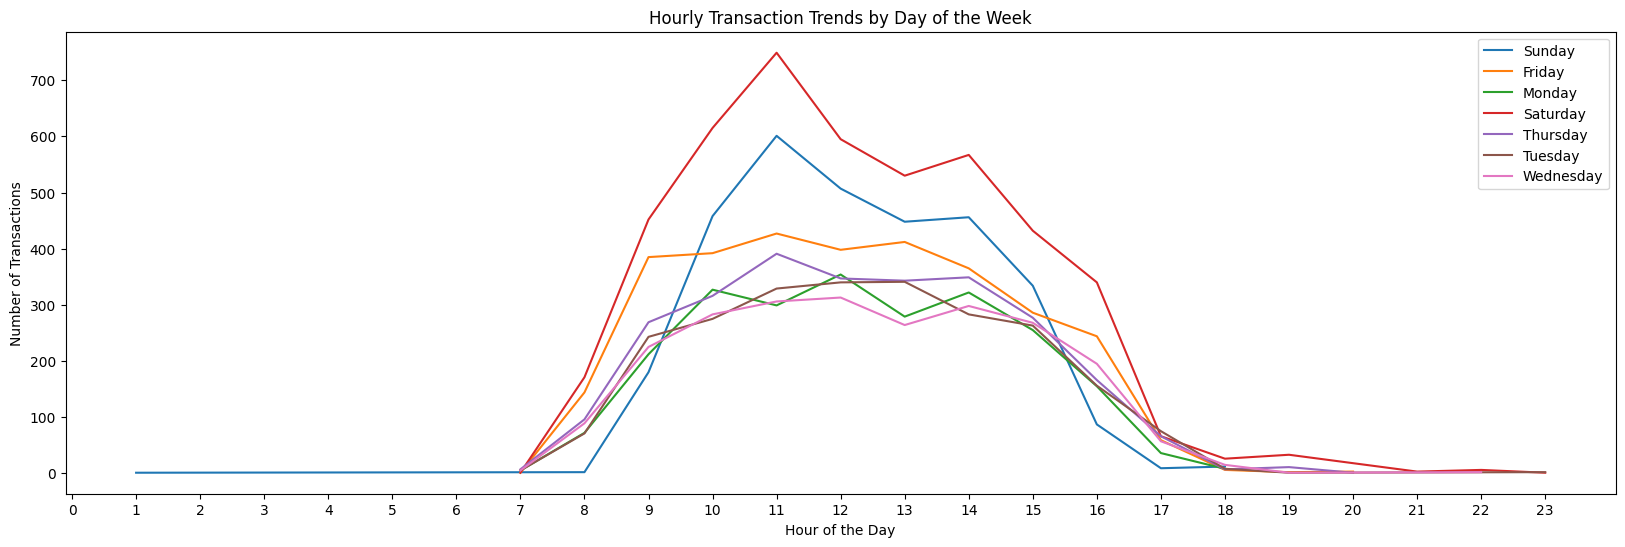

In [ ]:
# 17
daily_hourly_sales = df_separate.groupby(['day_name', 'hour'])['Transaction'].count().reset_index()

daily_hourly_sales = daily_hourly_sales.pivot(index='hour', columns='day_name', values='Transaction').fillna(0)

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_hourly_sales = daily_hourly_sales[days_order]

daily_hourly_sales.plot(kind='line', figsize=(15, 6))
plt.title('Hourly Transaction Trends by Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.legend(title='Day of Week')
plt.tight_layout()
plt.show()

18. The daily sales trend plot reveals that _______

**Penjelasan Visualisasi:**

- **Sumbu X (Jam dalam Sehari):** Menunjukkan waktu dalam sehari, dimulai dari pukul 00:00 hingga 23:00.
- **Sumbu Y (Jumlah Transaksi):** Menggambarkan jumlah transaksi yang terjadi pada setiap jam.
- **Garis Berbeda:** Mewakili hari-hari dalam seminggu (Senin hingga Minggu), dengan warna berbeda untuk masing-masing hari.

**Insight dari Grafik:**

- **Puncak Transaksi:** Secara umum, puncak transaksi terjadi antara pukul 10:00 hingga 14:00 setiap hari. Pada akhir pekan (Sabtu dan Minggu), volume transaksi cenderung lebih tinggi dibandingkan dengan hari kerja. Setelah pukul 15:00, transaksi mulai menurun signifikan.
  
- **Hari dengan Volume Tertinggi:** Sabtu (Saturday) menunjukkan volume transaksi tertinggi, terutama antara pukul 11:00 hingga 13:00. Minggu (Sunday) juga menunjukkan volume transaksi yang tinggi, meskipun sedikit lebih rendah dibandingkan dengan Sabtu.

- **Volume Lebih Rendah di Pagi dan Malam Hari:** Transaksi sangat rendah pada periode pukul 00:00 hingga 07:00, yang kemungkinan besar merupakan waktu ketika toko tidak beroperasi atau mengalami sepi. Setelah pukul 18:00, jumlah transaksi juga menurun drastis.

**Kesimpulan:**

Sabtu dan Minggu adalah hari-hari dengan volume transaksi tertinggi, sehingga fokuskan strategi promosi dan penambahan staf pada hari-hari tersebut. Waktu dengan jumlah transaksi tertinggi, yaitu antara pukul 10:00 hingga 14:00, merupakan waktu yang ideal untuk meningkatkan pelayanan pelanggan, melakukan restocking, dan fokus pada operasional lainnya. Pada malam hari, setelah pukul 18:00, transaksi menurun drastis, yang bisa dimanfaatkan untuk kegiatan seperti inventaris atau penutupan toko.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


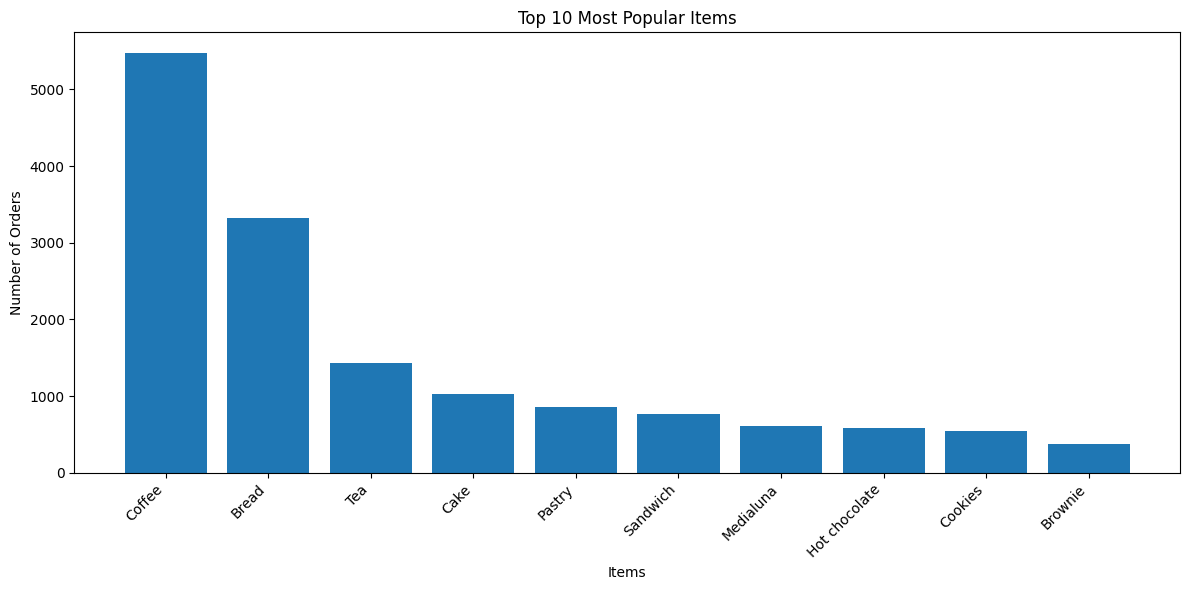

In [14]:
# 19
item_frequency = df_separate.groupby('Item')['Transaction'].count().reset_index()

item_frequency = item_frequency.rename(columns={'Transaction': 'Frequency'})

item_frequency = item_frequency.sort_values(by=['Frequency'], ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(item_frequency['Item'].head(10), item_frequency['Frequency'].head(10))
plt.xlabel('Items')
plt.ylabel('Number of Orders')
plt.title('Top 10 Most Popular Items')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-15-9804bb899307>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap


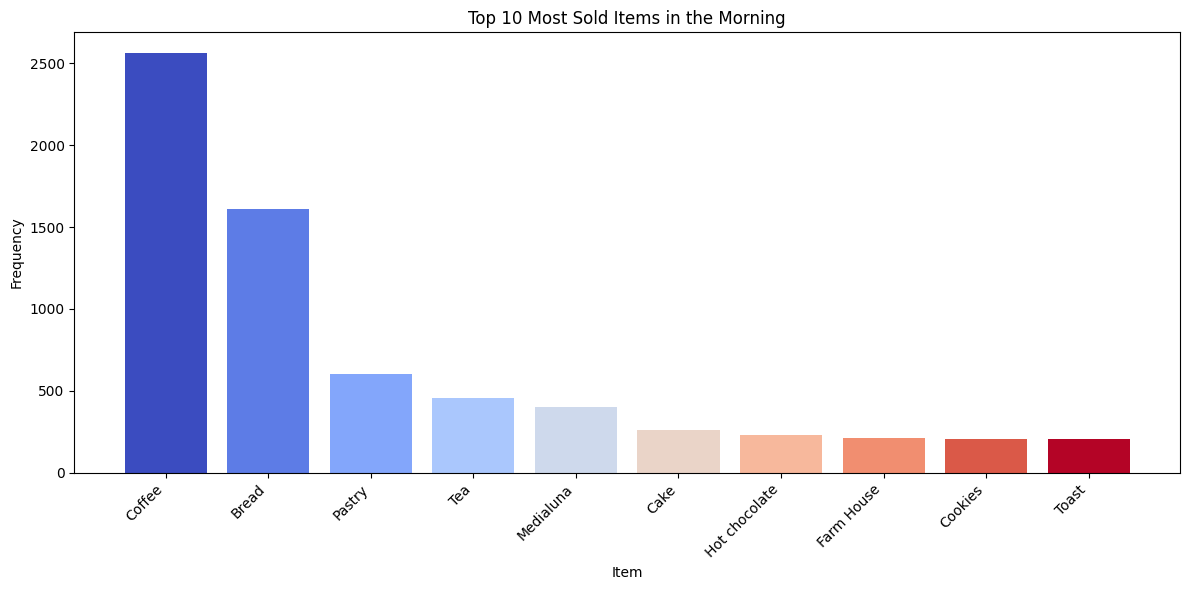

<ipython-input-15-9804bb899307>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap


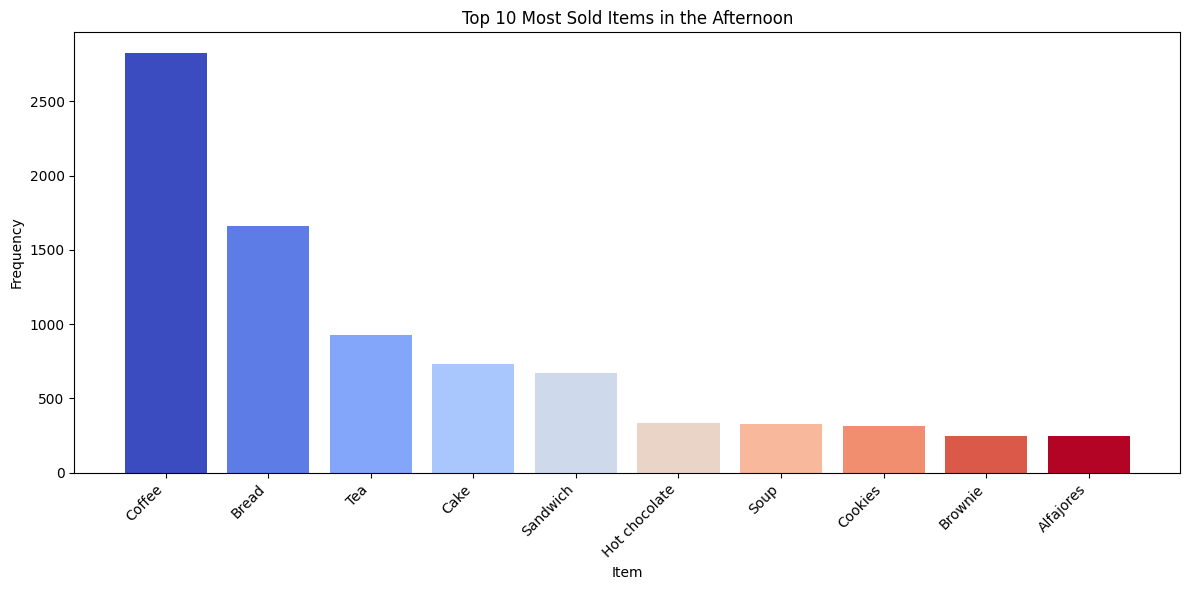

<ipython-input-15-9804bb899307>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap


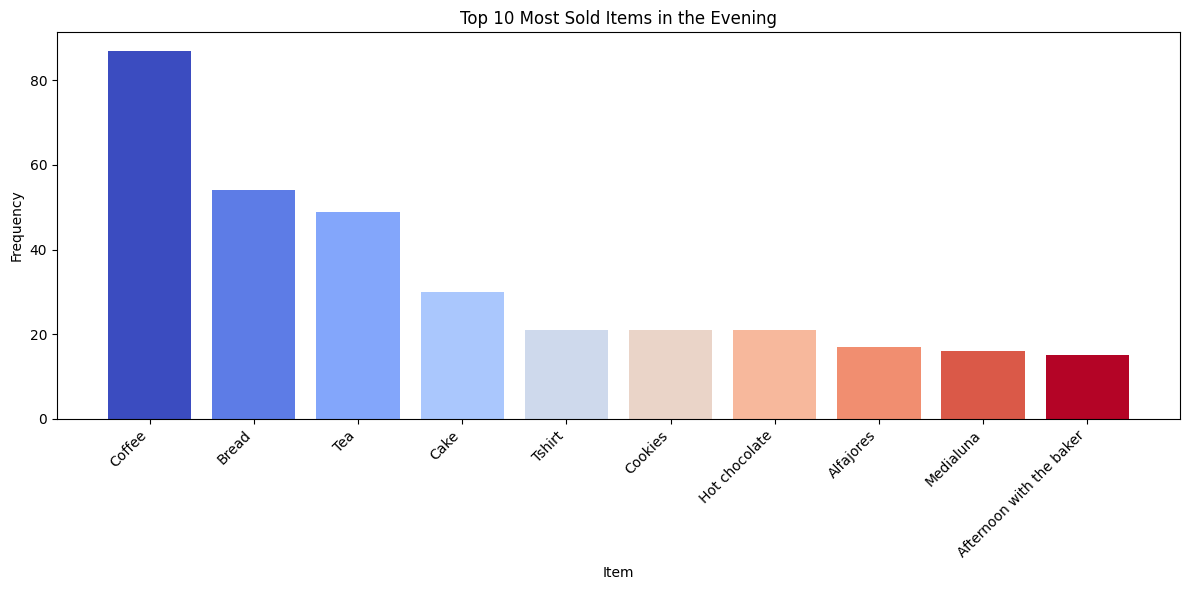

<ipython-input-15-9804bb899307>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap


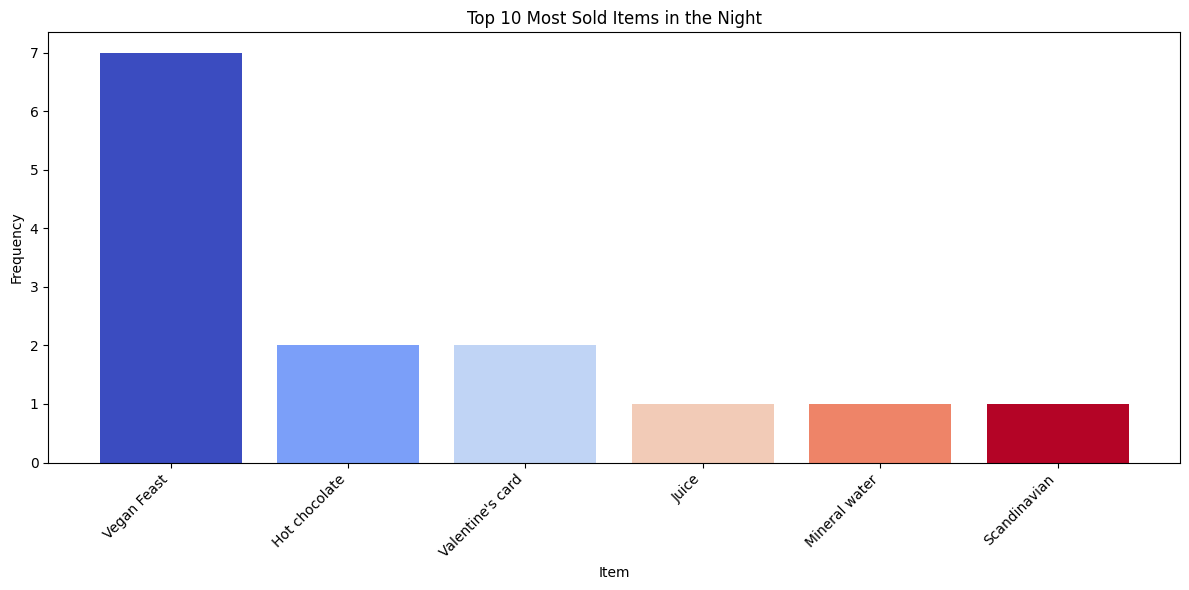

In [15]:
# 20
import matplotlib.cm as cm

def plot_top_items_by_period(period):
    period_data = df[df['period_day'] == period]

    item_frequency = period_data.groupby('Item')['Transaction'].count().reset_index()
    item_frequency = item_frequency.rename(columns={'Transaction': 'Frequency'})
    item_frequency = item_frequency.sort_values(by=['Frequency'], ascending=False)

    plt.figure(figsize=(12, 6)) # Fixed indentation here
    colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap
    plt.bar(item_frequency['Item'].head(10), item_frequency['Frequency'].head(10),
            color=[colors(i) for i in range(len(item_frequency.head(10)))])
    plt.xlabel('Item')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Most Sold Items in the {period.capitalize()}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

for period in df['period_day'].unique():
    plot_top_items_by_period(period)

21. It turns out that there is something different in the plot above, the insight is ____



Menggabungkan wawasan ini dengan data penjualan dari berbagai waktu dalam sehari:

Pagi: Kopi menjadi pilihan utama, diikuti dengan sarapan ringan seperti roti, pastry, dan teh, yang memenuhi kebutuhan pelanggan akan kenyamanan dan efisiensi di pagi hari.
Siang: Kopi masih populer, namun semakin sering dipadukan dengan camilan dan hidangan ringan seperti teh, kue, dan sandwich, menunjukkan perubahan preferensi menuju makanan yang lebih beragam dan fleksibel.
Sore: Kopi tetap menjadi favorit, dipasangkan dengan camilan yang menyenangkan seperti hot chocolate dan cookies, yang mencerminkan keinginan untuk bersantai dan menikmati waktu di sore hari.
Berdasarkan pola ini, bisnis dapat menyesuaikan penawaran mereka secara efektif:

Pagi: Tawarkan paket sarapan yang menggabungkan kopi, roti, dan pastry untuk menarik pelanggan di pagi hari.
Siang: Perkenalkan paket makan siang dengan sandwich, teh, dan camilan untuk memenuhi kebutuhan makan yang lebih santai.
Sore: Tawarkan camilan santai seperti hot chocolate dan cookies untuk pelanggan yang ingin bersantai di sore hari.
Malam: Soroti menu spesial malam, seperti Vegan Feast, untuk memenuhi permintaan yang lebih unik di jam malam.
Strategi berbasis waktu seperti ini dapat membantu memaksimalkan kepuasan pelanggan serta meningkatkan penjualan sepanjang hari.

I found a valentine card, I was curious about when people bought it so I made a visualization of it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


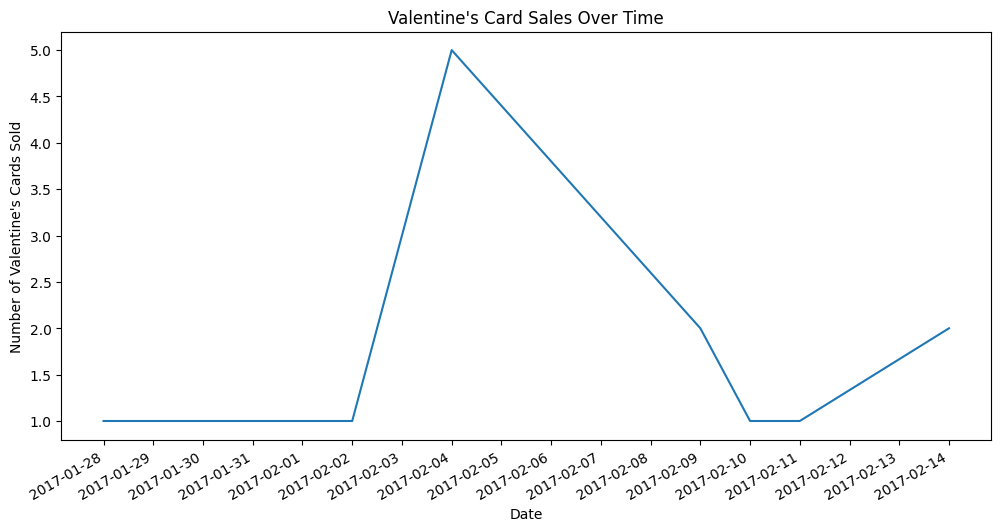

In [16]:
#22
valentines_card_transactions = df[df['Item'] == "Valentine's card"]

valentines_sales_by_date = valentines_card_transactions.groupby('date')['Transaction'].count()

plt.figure(figsize=(12, 6))
plt.plot(valentines_sales_by_date.index, valentines_sales_by_date.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1)) # Adjust interval as needed
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Number of Valentine\'s Cards Sold')
plt.title("Valentine's Card Sales Over Time")
plt.show()

23. I found the insight from the sale of the Valentine's cards above is ____


Grafik penjualan Valentine Card menunjukkan bahwa penjualan mulai meningkat pesat di awal Februari, dengan puncak terjadi sekitar tanggal 4-5 Februari. Hal ini mengindikasikan bahwa banyak orang mulai membeli kartu beberapa hari sebelum Hari Valentine. Setelah mencapai puncak tersebut, penjualan mengalami penurunan tajam karena sebagian besar konsumen telah melakukan pembelian. Namun, menjelang tanggal 14 Februari (Hari Valentine), terdapat sedikit lonjakan penjualan, yang kemungkinan besar berasal dari pembeli yang berbelanja di saat-saat terakhir. Pola ini mencerminkan karakteristik produk musiman, di mana permintaan meningkat menjelang acara, mencapai puncaknya sekitar sepuluh hari sebelum Hari Valentine, dan kemudian perlahan menurun setelahnya.

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [17]:
# 24
df_separate['Quantity'] = df_separate.groupby(['Transaction', 'Item'])['Item'].transform('count')

data = df_separate.drop_duplicates(subset=['Transaction', 'Item'])

transaction_data = df_separate.pivot_table(index='Transaction', columns='Item', values='Quantity', aggfunc='sum').fillna(0)

display(transaction_data.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#25
transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)

display(transaction_data.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-18-89cf4135d644>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [19]:
# 26
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)
frequent_itemsets_df = frequent_itemsets[['support', 'itemsets']]

display(frequent_itemsets_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [ ]:
# 27
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=frequent_itemsets.shape[0]) # Added num_itemsets

display(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
19,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
13,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
15,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
10,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
16,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
7,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
9,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
1,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
4,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



**Tren Transaksi:** Pola transaksi harian menunjukkan bahwa penjualan tertinggi toko roti terjadi pada akhir pekan (Sabtu dan Minggu), yang sejalan dengan waktu luang pelanggan yang lebih banyak untuk menikmati roti sebagai bagian dari rutinitas mereka. Jam sibuk toko roti berkisar antara pukul 10 pagi hingga 12 siang, menunjukkan bahwa banyak pelanggan datang untuk menikmati camilan menjelang makan siang, makan siang ringan, atau membeli roti untuk konsumsi mereka. Penjualan cenderung meningkat menjelang akhir tahun, kemungkinan besar dipengaruhi oleh musim liburan dan perayaan.

**Popularitas Produk:** Produk yang paling banyak dibeli adalah Kopi, Roti, dan Teh, yang mencerminkan pilihan utama pelanggan untuk kebutuhan dasar ini. Produk-produk tersebut tetap diminati sepanjang hari (pagi, siang, sore, dan malam), menunjukkan permintaan yang konsisten terhadap produk-produk tersebut tanpa dipengaruhi waktu. Namun, penjualan Cookies, Hot Chocolate, dan Cake cenderung lebih tinggi di siang atau sore hari, yang menunjukkan bahwa produk ini lebih disukai sebagai camilan sore. Penjualan kartu Valentine meningkat pesat pada bulan Februari, khususnya sekitar tanggal 14 Februari, sesuai dengan tren produk musiman.

**Asosiasi Produk (Algoritma Apriori):** Algoritma Apriori mengidentifikasi asosiasi produk yang sering dibeli bersamaan, seperti Kopi dan Toast, yang memiliki nilai lift tinggi. Kombinasi lain yang sering terjadi termasuk Kopi dengan Medialuna, Pastry, dan Cake, yang memberikan peluang untuk membuat penawaran atau promosi bundel guna mendorong pembelian produk tersebut bersama-sama.

**Rekomendasi:**

Berdasarkan analisis ini, toko roti dapat mempertimbangkan beberapa strategi:

- **Staf dan Inventaris:** Sesuaikan jumlah staf dan kelola inventaris secara efisien untuk menghadapi lonjakan permintaan di waktu sibuk (pukul 10 pagi hingga 12 siang) dan akhir pekan.

- **Strategi Promosi:** Tawarkan bundel atau diskon untuk kombinasi produk populer seperti Kopi dan Toast untuk mendorong pembelian paket produk ini.

- **Fokus Produk:** Prioritaskan produk utama toko roti, seperti Kopi, Roti, Teh, dan Pastry, dengan memastikan stok yang cukup untuk memenuhi permintaan yang konsisten.

- **Musim dan Acara Khusus:** Manfaatkan momen spesial seperti Hari Valentine dengan penawaran produk atau promosi yang relevan untuk meningkatkan penjualan di periode tersebut.

- **Camilan Sore:** Promosikan produk seperti Cookies, Cake, dan Hot Chocolate di siang atau sore hari untuk menarik pelanggan yang mencari camilan ringan.

Dengan memanfaatkan wawasan dan rekomendasi ini, toko roti dapat mengoptimalkan operasional, meningkatkan variasi produk, dan meningkatkan kepuasan pelanggan.